In [1]:
import pandas as pd

In [51]:
Point2_data= pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data.csv')

In [52]:
Point2_data

,Beds,Bath,Sqft,Price,Address,latitude,longitude
0,2.0,1.0,1200.0,240000.0,"2782 Hwy 362 NS, Canada",45.046471,-65.064869
1,3.0,1.0,1630.0,225000.0,"1368 Forties Rd. NS, Canada",44.734216,-64.539807
2,5.0,2.0,2721.0,690000.0,"2591 Clarence Road NS, Canada",44.904340,-65.218431
3,15.0,6.0,6630.0,495000.0,"4616 Highway 1 Weymouth NS, Canada",44.411117,-65.995788
4,5.0,5.0,2700.0,499950.0,"372 ST George St NS, Canada",44.742408,-65.516158
...,...,...,...,...,...,...,...
2057,3.0,2.0,1655.0,484900.0,"Lot 19 242 Curtis Drive NS, Canada",NaN,NaN
2058,2.0,2.0,1152.0,179900.0,"21 Bonnie Brae NS, Canada",44.648317,-63.534459
2059,3.0,1.0,1470.0,149000.0,"186 Henry Hensey Drive NS, Canada",44.037933,-64.722590
2060,3.0,1.0,2412.0,349000.0,"62 Smith Road NS, Canada",44.440700,-64.892060


<AxesSubplot:>

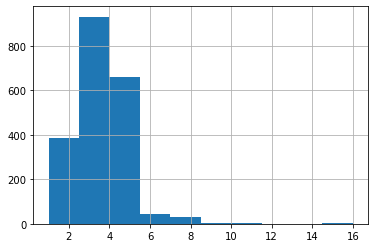

In [55]:
Point2_data['Beds'].hist()

It is clear to see that only small amount of houses have more than four bedrooms

Three-bedroom houses is most popular one

In [57]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


In [354]:
Beds = Point2_data['Beds'].value_counts()
Baths = Point2_data['Bath'].value_counts()
df = pd.DataFrame({'Beds': Beds,'Baths': Baths})

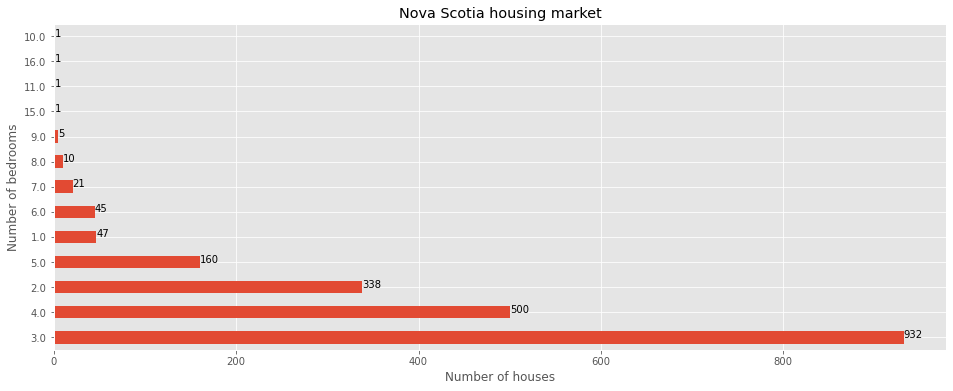

In [175]:
Beds.plot(kind='barh',figsize=(16,6))
plt.title('Nova Scotia housing market with Bedrooms')
plt.xlabel('Number of houses')
plt.ylabel('Number of bedrooms')
for index, value in enumerate(Beds):
    plt.text(value, index, str(value))

#### Three bedrooms are the most common type of house in NS ###
    
Let's look at bathroom

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


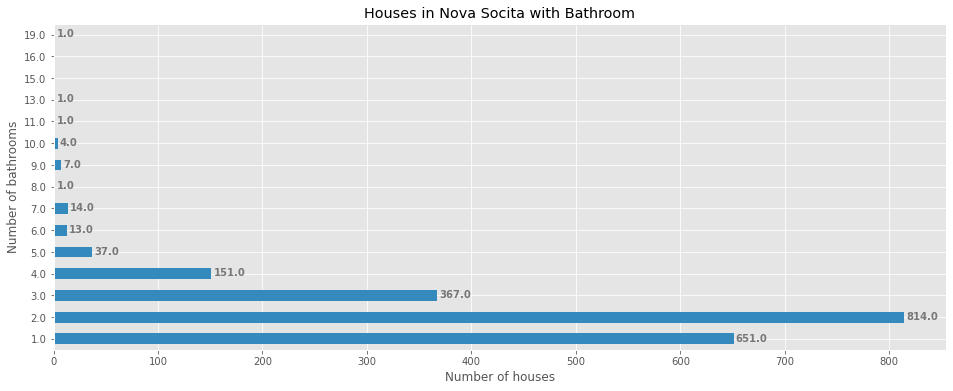

In [185]:
ax = df['Baths'].plot.barh(figsize=(16,6), color='C1')
ax.set_xlabel('Number of houses')
ax.set_ylabel('Number of bathrooms')
ax.set_title('Houses in Nova Socita with Bathroom')
for i, v in enumerate(df['Baths']):
    ax.text(v +2, i -0.1 , str(v), color = 'C3', fontweight = 'bold')

#### Two bedrooms are the most common type of house in NS

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


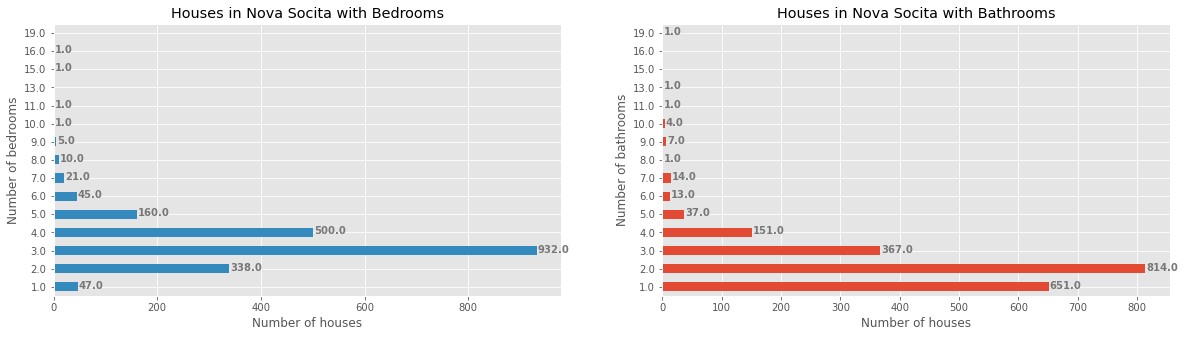

In [360]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: 
df['Beds'].plot(kind='barh', color='C1', figsize=(20, 5), ax=ax0) # add to subplot 1
ax0.set_title('Houses in Nova Socita with Bedrooms')
ax0.set_ylabel('Number of bedrooms')
ax0.set_xlabel('Number of houses')
for i, v in enumerate(df['Beds']):
    ax0.text(v +2, i -0.1 , str(v), color = 'C3', fontweight = 'bold')
    
# Subplot 2: 
df['Baths'].plot(kind='barh',  color='C0', figsize=(20, 5), ax=ax1) # add to subplot 2
ax1.set_title ('Houses in Nova Socita with Bathrooms')
ax1.set_ylabel('Number of bathrooms')
ax1.set_xlabel('Number of houses')
for i, v in enumerate(df['Baths']):
    ax1.text(v +2, i -0.1 , str(v), color = 'C3', fontweight = 'bold')
plt.show()

### Now I want to see what combination of bedrooms and bathrooms are popular

In [446]:
df_bb = Point2_data[['Beds','Bath']]

In [447]:
df_bb = df_bb.groupby(['Beds','Bath']).size()

In [384]:
df_buble = pd.DataFrame({'Counts':df_bb})

In [386]:
df_buble = df_buble.reset_index()

In [388]:
norm = (df_buble['Counts'] - df_buble['Counts'].min()) / (df_buble['Counts'].max() - df_buble['Counts'].min())

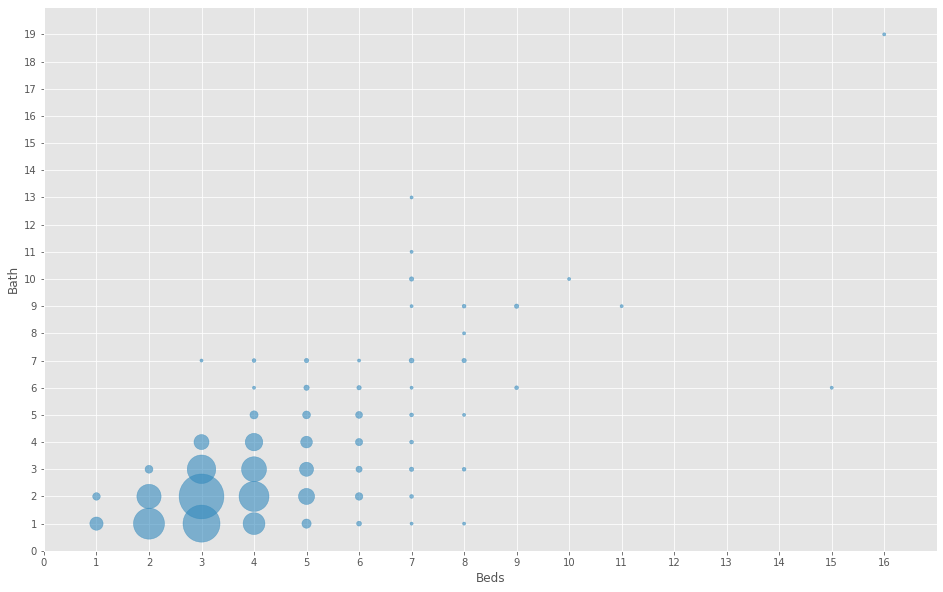

In [509]:
ax = df_buble.plot(kind='scatter',
                    x='Beds',
                    y='Bath',
                    figsize=(16, 10),
                    alpha=0.6,  # transparency
                    c = 'C1',
                    s=norm * 2000 + 10,  # pass in weights 
                    xlim=(0, 17),
                    ylim=(0,20)
             )
ax.set_yticks(np.arange(0, 20, step=1))
ax.set_xticks(np.arange(0, 17, step=1))

It is not hard to find that **three bedrooms with two Bathroom**  is the most type of houses in the market.

However, what about the price of different types of houses?

In [393]:
df_types = Point2_data[['Beds','Bath','Price']]

In [396]:
df_types.tail()

,Beds,Bath,Price
2057,3.0,2.0,484900.0
2058,2.0,2.0,179900.0
2059,3.0,1.0,149000.0
2060,3.0,1.0,349000.0
2061,3.0,2.0,1200000.0


In [465]:
df_type = df_types.groupby(['Beds','Bath']).mean().reset_index()

In [470]:
df_type.head()

,Beds,Bath,Price
0,1.0,1.0,188993
1,1.0,2.0,381554
2,2.0,1.0,223526
3,2.0,2.0,352051
4,2.0,3.0,971683


In [471]:
df_type.tail()

,Beds,Bath,Price
49,9.0,9.0,879666
50,10.0,10.0,495000
51,11.0,9.0,499000
52,15.0,6.0,495000
53,16.0,19.0,1795000


In [466]:
df_type['Price']= df_type['Price'].astype(int)

In [468]:
norm2 = (df_type['Price'] - df_type['Price'].min()) / (df_type['Price'].max() - df_type['Price'].min())

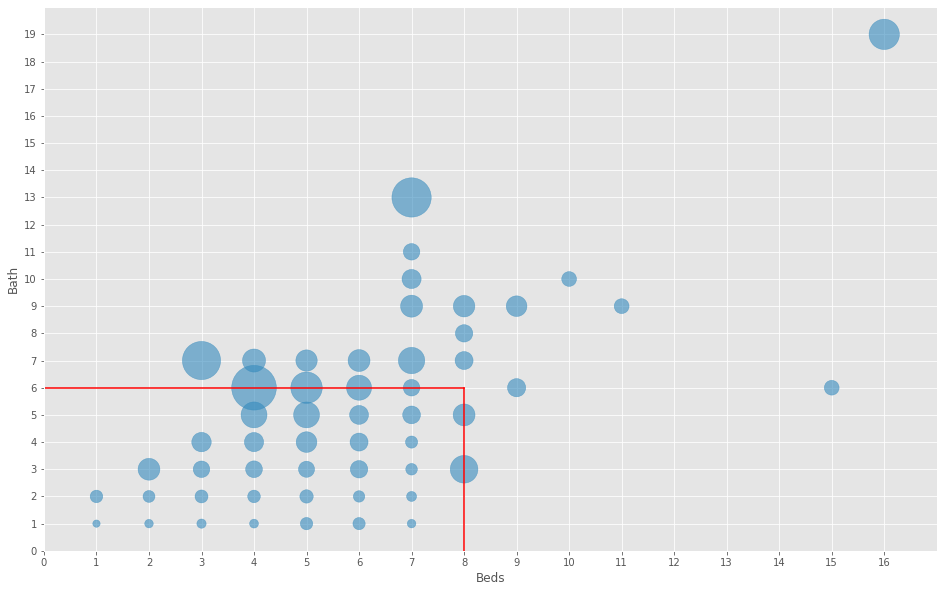

In [535]:
ax1 = df_type.plot(kind='scatter',
                    x='Beds',
                    y='Bath',
                    figsize=(16, 10),
                    alpha=0.6,  # transparency
                    c = 'C1',
                    s=norm2 * 2000,  # pass in weights 
                    xlim=(0, 17),
                    ylim=(0,20)
             )
ax1.set_yticks(np.arange(0, 20, step=1))
ax1.set_xticks(np.arange(0, 17, step=1))

x1 = np.ones(7)*8
y1 = np.arange(0, 7, step=1)
x2 = np.arange(0, 9, step=1)
y2 = np.ones(9)*6
ax1.plot(x1 ,y1, color='red')
ax1.plot(x2 ,y2, color='red')

It is likely that **adding one more bedroom is *cheaper* than adding one more bathroom**, when the house has less than eight bedrooms and six bathrooms.

### Let's find out how much will the average price change, when adding a bedroom or bathroom

In [560]:
df_diff=df_type

In [724]:
bedlist = df_diff['Beds'].astype(int)
bathlist = df_diff['Bath'].astype(int)
pricelist=df_diff['Price'].astype(int)

In [709]:
bed = list(np.arange(0,17,step=1))
bath = list(np.arange(0,20,step=1))

In [713]:
c = pd.DataFrame(columns=[bath], index=bed)

In [725]:
c.iloc[bedlist[1],bathlist[1]]

nan

In [726]:
pricelist[1]

381554

In [733]:
for i in range(len(bedlist)):
    c.iloc[bedlist[i],bathlist[i]] = pricelist[i]

In [754]:
diff_addbed=c.diff()
diff_addbath=c.diff(axis=1)

In [737]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,188993,381554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,223526,352051,971683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,247707,399701,595373,791002,NaN,NaN,2799000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,234846,383902,610486,773039,1334592,3795000,1074950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,373494,420579,569141,879746,1329637,1923860,933316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,367000,331963,651507,689630,752622,1249966,979000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,224900,274500,338800,362450,674450,599000,1377500,NaN,985000,766333,595000,NaN,2950000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,89000,NaN,1504500,NaN,975000,NaN,689666,649000,946950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,705000,NaN,NaN,879666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [759]:
diff_addbed = diff_addbed.iloc[:12, :10]

In [779]:
diff_addbed = diff_addbed.rename(columns = {0:"Bath"})

In [781]:
diff_addbed = diff_addbed.rename( {0:"Bed"})

In [782]:
diff_addbed

,Bath,1,2,3,4,5,6,7,8,9
Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,34533,-29503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,24181,47650,-376310,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,-12861,-15799,15113,-17963,NaN,NaN,-1724050,NaN,NaN
5,NaN,138648,36677,-41345,106707,-4955,-1871140,-141634,NaN,NaN
6,NaN,-6494,-88616,82366,-190116,-577015,-673894,45684,NaN,NaN
7,NaN,-142100,-57463,-312707,-327180,-78172,-650966,398500,NaN,NaN
8,NaN,-135900,NaN,1165700,NaN,300550,NaN,-687834,NaN,-38050
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67284


**In most of cases, adding a Bedroom to the house has *no sign of increasing* the price of the house.**

In [757]:
diff_addbath=diff_addbath.transpose()

In [761]:
diff_addbath= diff_addbath.iloc[:12,:10]

In [773]:
diff_addbath = diff_addbath.rename(columns = {0 : 'bed'} )
diff_addbath = diff_addbath.rename( {0 : 'bath'} )

In [778]:
diff_addbath

,bed,1,2,3,4,5,6,7,8,9
bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,192561,128525,151994,149056,47085,-35037,49600,NaN,NaN
3,NaN,NaN,619632,195672,226584,148562,319544,64300,NaN,NaN
4,NaN,NaN,NaN,195629,162553,310605,38123,23650,NaN,NaN
5,NaN,NaN,NaN,NaN,561553,449891,62992,312000,NaN,NaN
6,NaN,NaN,NaN,NaN,2460408,594223,497344,-75450,NaN,NaN
7,NaN,NaN,NaN,NaN,-2720050,-990544,-270966,778500,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40666,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297950,NaN


**In contrast, adding a Bathroom to the house has *an increase* the price of the house for most of cases**